In [1]:
#import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
sns.set()
%matplotlib inline



In [2]:
#read the data and have a look at the data

data = pd.read_csv("Dummy Data HSS.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


This data contains :
*TV promotion budget (in million)
*Social Media promotion budget (in million)
*Radio promotion budget (in million)
*Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
*Sales (in million)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
display(data.dtypes.value_counts())

float64    4
object     1
dtype: int64

# Preprocessing

Check for Null vales

In [6]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

we can see that TV promotion budget has 10 null values, Radio has 4 , social media promotion budget as well as sales generation both has 6 null values. 

Dealing with the null values of each of the column mentioned above

In [7]:
mean_TV=data['TV'].mean()
mean_TV

54.06685664182376

In [8]:
mean_Radio=data['Radio'].mean()
mean_Radio

18.16035589266265

In [9]:
mean_socialM = data['Social Media'].mean()
mean_socialM

3.323956161385462

In [10]:
mean_sales = data['Sales'].mean()
mean_sales

192.46660210662034

Replacing the Null values with the mean of the column

In [11]:
data['TV'].fillna(value=mean_TV, inplace=True)
data['Radio'].fillna(value=mean_Radio, inplace=True)
data['Social Media'].fillna(value=mean_socialM, inplace=True)
data['Sales'].fillna(value=mean_sales, inplace=True)

In [12]:
data.isnull().sum() 

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

Now it is clear of Null values

Checking for Outliers

<AxesSubplot:xlabel='TV'>

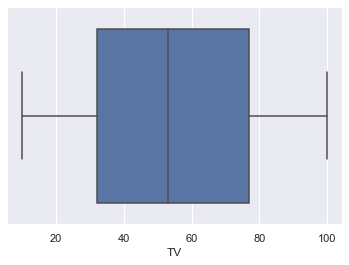

In [13]:
sns.boxplot(data=data,x='TV')

<AxesSubplot:xlabel='Social Media'>

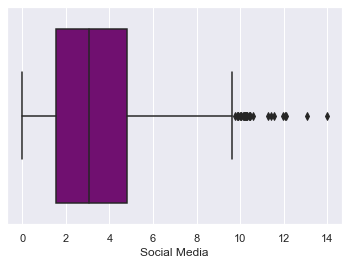

In [14]:
sns.boxplot(data=data,x='Social Media',color ='purple')

We can see lot of outliers in Social Media promotion Budget.

<AxesSubplot:xlabel='Radio'>

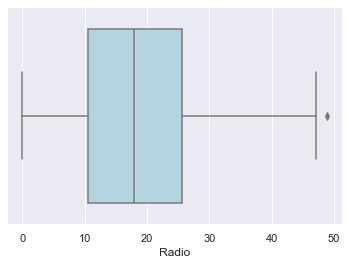

In [15]:
sns.boxplot(data=data,x='Radio',color ='lightblue')

Here also we can see one outlier

<AxesSubplot:xlabel='Sales'>

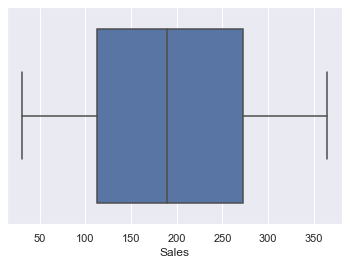

In [16]:
sns.boxplot(data=data,x='Sales')

Dealing with the outliers using Interquartile Range method

In [17]:
q3 = data['Social Media'].quantile(.75)
q1 = data['Social Media'].quantile(.25)
iqr = q3-q1
iqr


3.2759529700000005

In [18]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data2 = data[(data['Social Media']>bottomrange) & (data['Social Media']<upperrange)]
data2 

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


<AxesSubplot:xlabel='Social Media'>

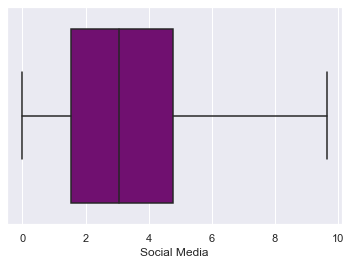

In [19]:
sns.boxplot(data=data2,x='Social Media',color ='purple')

we can see that ouliers from Social media budget is now removed

In [20]:
q3 = data2['Radio'].quantile(.75)
q1 = data2['Radio'].quantile(.25)
iqr = q3-q1
iqr

15.021841877499996

In [22]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data3 = data2[(data2['Radio']>bottomrange) & (data2['Radio']<upperrange)]
data3 

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


<AxesSubplot:xlabel='Radio'>

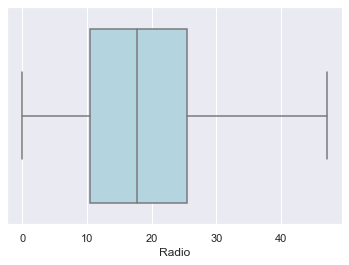

In [23]:
sns.boxplot(data=data3,x='Radio',color ='lightblue')

we can see in the above plots there are no outliers now

In [24]:
data = data3.copy()

Mapping the categorical values

In [25]:
data['Influencer'] = data['Influencer'].map({'Mega': 1,'Macro': 2,'Nano': 3,'Micro': 4})


In [26]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,4,56.594181
5,29.0,9.614382,1.027163,1,105.889148
6,55.0,24.893811,4.273602,4,198.679825
7,31.0,17.355042,2.289855,3,108.733932
8,76.0,24.648898,7.130116,2,270.189400
9,13.0,0.431128,2.229423,1,48.280582


Normalization of data using Simple Feature scaling

In [27]:
data["TV"] = data["TV"]/data["TV"].max()
data["Radio"] = data["Radio"]/data["Radio"].max()
data["Social Media"] = data["Social Media"]/data["Social Media"].max()
data["Sales"] = data["Sales"]/data["Sales"].max()
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,0.16,0.139362,0.301690,1,0.150332
1,0.13,0.196063,0.249982,1,0.128208
2,0.41,0.337175,0.302253,1,0.412486
3,0.83,0.637147,0.718158,1,0.819179
4,0.15,0.179076,0.145866,4,0.155444


# Exploratory Data Analysis

<AxesSubplot:xlabel='Sales', ylabel='TV'>

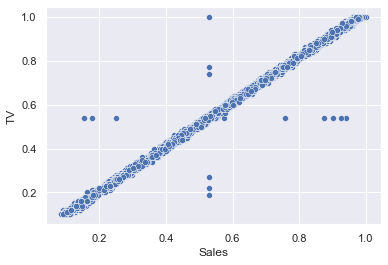

In [28]:
sns.scatterplot(y = 'TV', x = 'Sales', data = data)


<AxesSubplot:xlabel='Sales', ylabel='Social Media'>

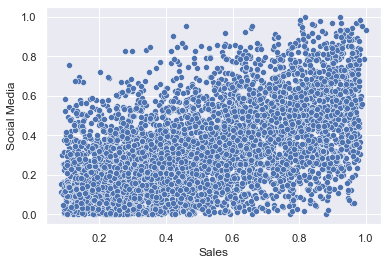

In [29]:
sns.scatterplot(y = 'Social Media', x = 'Sales', data = data)

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

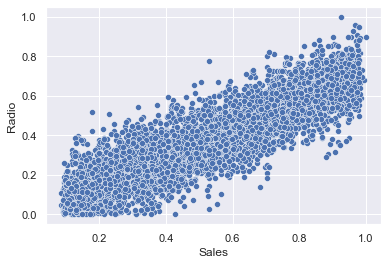

In [30]:
sns.scatterplot(y = 'Radio', x = 'Sales', data = data)

All the promotion budget are positively related to sales.

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

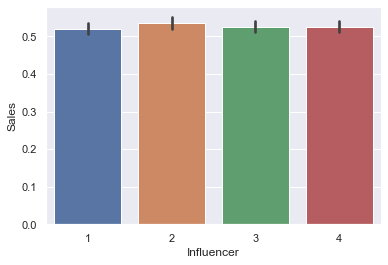

In [31]:
sns.barplot(x = 'Influencer', y = 'Sales', data = data)

All the Influencer has almost same significance on sales

# Modeling

In [33]:
#choosing the independent and dependent variable
#here we are choosing these different media promotion budget to know its impact on sales generation.

x = data[['TV','Social Media','Radio','Influencer']]
y = data[['Sales']]

In [35]:
#train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=365)

In [44]:
#Usings Statsmodel

x1 = sm.add_constant(x)
results = sm.OLS(train_y,train_x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.492e+05
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        12:28:45   Log-Likelihood:                          8756.3
No. Observations:                3634   AIC:                                 -1.750e+04
Df Residuals:                    3630   BIC:                                 -1.748e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               0.9617      0.003    362.019      0.000       0.956       0.967
Social Media     0.0023      0.002      1.155      0.248      -0.002       0.006
Radio            0.0204      0.004      5.469      0.000       0.013       0.028
Influencer    8.237e-05      0.000      0.352      0.725      -0.000       0.001
==============================================================================
Omnibus:                     3613.310   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6645154.083
Skew:                           3.640   Prob(JB):                         0.00
Kurtosis:                     212.365   Cond. No.                         34.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Higher the t-statistic more significant the variable is.TV is more significant than other three variables.(t statistic-362.019)  

Ho: β1 = 0 (Promotion budget of TV, Radio, Social Media and Influence does not have significant impact on sales) 
H1: βί ≠ 0 (Promotion budget of TV, Radio, Social Media and Influence have significant impact on sales)

Since the Prob (F-statistic):	0.00 which is less 0.05 we can reject the null hypothesis and say that Promotion budget of TV, Radio, Social Media and Influence have significant impact on sales.

And Since the P value of Social Media and Influencer is more than 0.05 we can say that these are significant independent variables.

In [45]:
#importing linear model and fitting the data using sklearn

from sklearn import linear_model

regr = linear_model.LinearRegression()

In [46]:
regr.fit (train_x, train_y)

LinearRegression()

In [47]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.61593914e-01 2.28459225e-03 2.03937955e-02 6.14197329e-05]]
Intercept:  [0.00010987]


# Making Predictions

In [48]:
test_y_hat = regr.predict(test_x)
test_y_hat[1]

array([0.14831451])

# Evaluation

In [49]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
lr_predict = regr.predict(test_x)


print("R2 Score:", r2_score(test_y, lr_predict)*100,"%")
print("Mean Squarred Error:", mean_squared_error(test_y, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(test_y, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,lr_predict)))



R2 Score: 99.56203878069151 %
Mean Squarred Error: 0.0002908567386467282
RMSE: 0.01705452252766779
Mean Absolute Error : 0.007140007113965544
